# Model with initialization of weights with zeroes

## Importing Neccessary Libraries

In [220]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons
print(f"Keras version: {keras.__version__}")

Keras version: 3.10.0


## Loading the Dataset

In [221]:
# load make moons with 100 samples
X, y = make_moons(n_samples=100, noise=0.5, random_state=0)

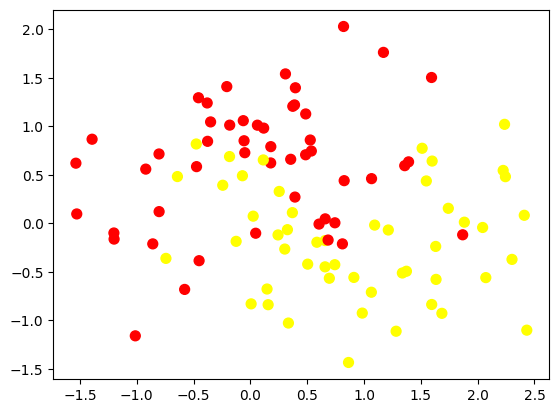

In [222]:
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plt.show()

## Model Builing with Zero Weight Initialization

---

### Model with Relu and Sigmoid Activation Functions

In [223]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(2,)),
        keras.layers.Dense(4, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [224]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [225]:
model.get_weights()

[array([[-0.7759745 ,  0.31637526, -0.24988317,  0.7021408 ],
        [ 0.7504947 , -0.68502665, -0.2667935 , -0.20563245]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.76313305],
        [-0.6789821 ],
        [-0.83606416],
        [-0.62381685]], dtype=float32),
 array([0.], dtype=float32)]

In [226]:
len(model.get_weights())

4

In [227]:
initial_weights = model.get_weights()
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [228]:
model.set_weights(initial_weights)

In [229]:
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [230]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [231]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.4477 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.4688 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3391 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5195 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4883 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4766 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [232]:
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.00937812], dtype=float32)]

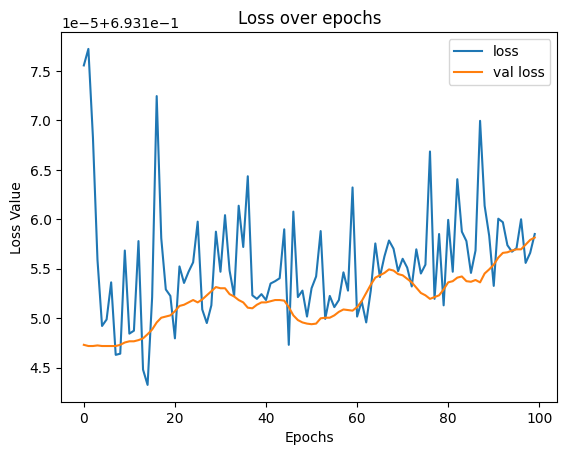

In [233]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.show()

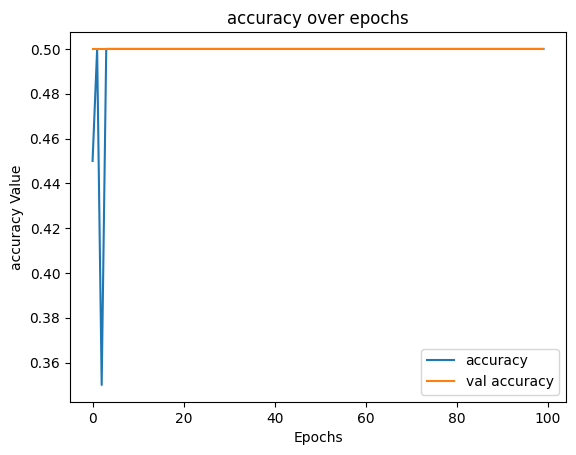

In [234]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title("accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("accuracy Value")
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 993us/step


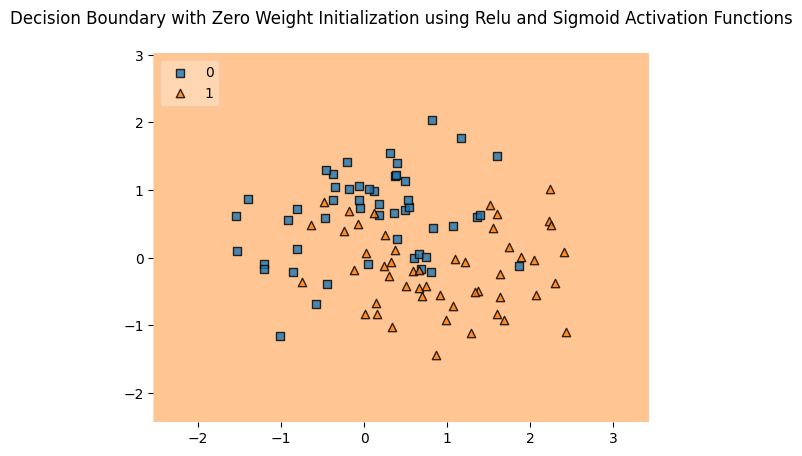

In [235]:
plot_decision_regions(X, y, clf=model, legend=2)
plt.title("Decision Boundary with Zero Weight Initialization using Relu and Sigmoid Activation Functions\n")
plt.show()

### Model with Tanh and Sigmoid Activation Function

In [236]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(2,)),
        keras.layers.Dense(4, activation='tanh'),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [237]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [238]:
model.get_weights()

[array([[ 0.06265712, -0.26213384, -0.57782173,  0.69683313],
        [-0.25128102,  0.3181138 , -0.12865543,  0.14408469]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.738387  ],
        [-1.0660832 ],
        [ 1.0619822 ],
        [ 0.43340123]], dtype=float32),
 array([0.], dtype=float32)]

In [239]:
model.set_weights(initial_weights)

In [240]:
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [241]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [242]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.5391 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4922 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4352 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4437 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4766 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5000 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss

In [243]:
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.00038361], dtype=float32)]

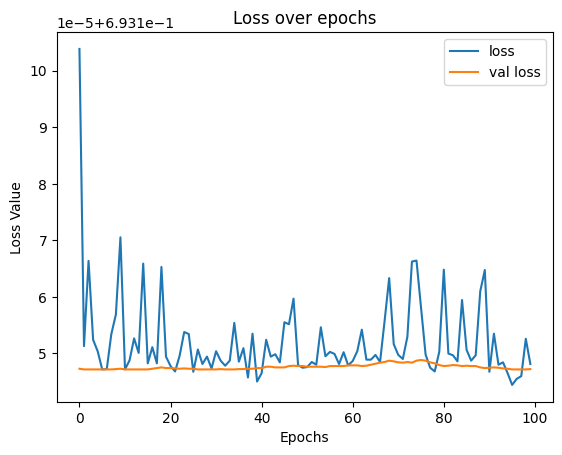

In [244]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.show()

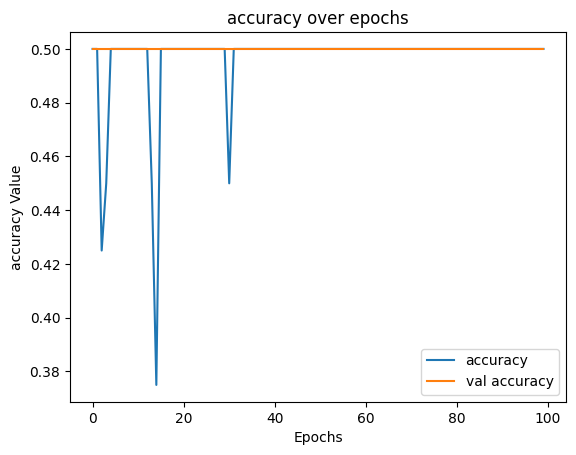

In [245]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title("accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("accuracy Value")
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


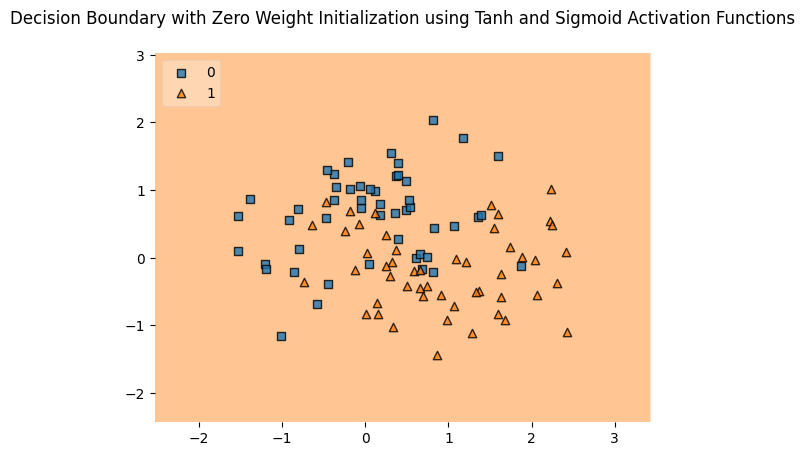

In [246]:
plot_decision_regions(X, y, clf=model, legend=2)
plt.title("Decision Boundary with Zero Weight Initialization using Tanh and Sigmoid Activation Functions\n")
plt.show()

### Model with Sigmoid Activation Functions at all layers

In [247]:
model = keras.Sequential(
    [
        keras.layers.Input(shape=(2,)),
        keras.layers.Dense(4, activation='sigmoid'),
        keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [248]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [249]:
model.get_weights()

[array([[ 0.38902807,  0.7833123 , -0.588254  ,  0.16895223],
        [-0.5342386 ,  0.368814  ,  0.43348145,  0.10399866]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.2008155 ],
        [ 0.6321292 ],
        [-0.18608499],
        [-1.0916662 ]], dtype=float32),
 array([0.], dtype=float32)]

In [250]:
model.set_weights(initial_weights)

In [251]:
model.get_weights()

[array([[0., 0., 0., 0.],
        [0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [252]:
model.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [253]:
history = model.fit(X, y, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.4477 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4836 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5234 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5117 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4766 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4609 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss

In [254]:
model.get_weights()

[array([[ 0.42163712,  0.42163712,  0.42163712,  0.42163712],
        [-0.47266516, -0.47266516, -0.47266516, -0.47266516]],
       dtype=float32),
 array([-0.09027804, -0.09027804, -0.09027804, -0.09027804], dtype=float32),
 array([[0.08194102],
        [0.08194102],
        [0.08194102],
        [0.08194102]], dtype=float32),
 array([-0.03407979], dtype=float32)]

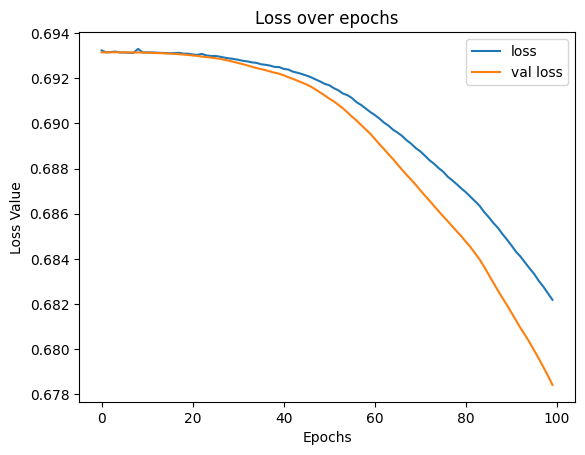

In [255]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.show()

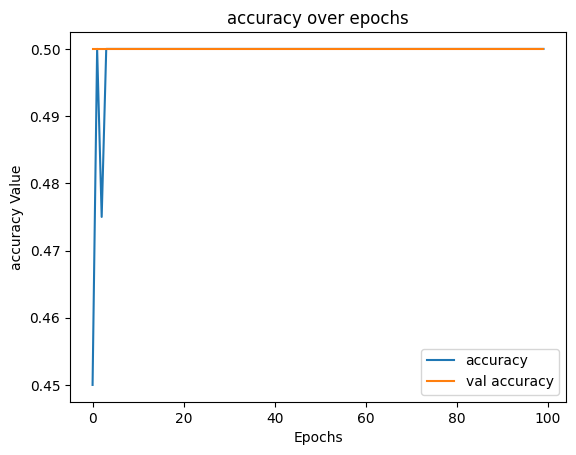

In [256]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.title("accuracy over epochs")
plt.xlabel("Epochs")
plt.ylabel("accuracy Value")
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


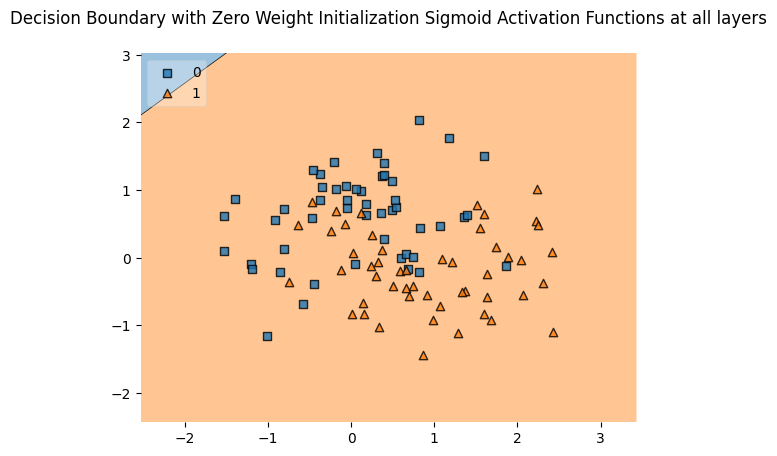

In [257]:
plot_decision_regions(X, y, clf=model, legend=2)
plt.title("Decision Boundary with Zero Weight Initialization Sigmoid Activation Functions at all layers\n")
plt.show()